<a href="https://colab.research.google.com/github/dzuriahilma/bangkit/blob/main/Salinan_dari_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dzuria Hilma Qurotu Ain
- **Email:** m180d4kx1409@bangkit.academy
- **ID Dicoding:** m180d4kx1409

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan CO di Stasiun Gucheng?
- Apa tipe wd yang sering terjadi di Stasiun Gucheng?
- Apakah terdapat korelasi antara SO2 dan O3?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

## Data Wrangling

### Gathering Data

### Menampilkan DataFrame pada data laporan kualitas udara di Stasiun Gucheng

In [ ]:
gucheng_df = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv") #proses import data
gucheng_df.head() #menampilkan 5 baris pertama pada data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assessing Data

In [ ]:
#Periksa tipe data setiap kolom pada data Gucheng
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
#Periksa missing values tiap kolom pada data Gucheng
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Berdasarkan output yang didapatkan, dapat dilihat pada variabe 'MP2.5' sampai pada variabel 'WSPM' terdapat missing value, maka perlu diolah lebih lanjut



In [ ]:
#Periksa data duplikat pada data Gucheng
print("Jumlah duplikat: ",gucheng_df.duplicated().sum())

Jumlah duplikat:  0


Tidak terdapat duplikat pada data

### Cleaning Data

In [ ]:
#Hapus kolom yang tidak diperlukan dalam dataframe (Menghapus Statiun karena sudah diketahui)
gucheng_df.drop(['station'], axis=1, inplace=True)
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6


## Exploratory Data Analysis (EDA)

### Explore Statistika Deskriptif pada data di Stasiun Gucheng

In [ ]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Berdasarkan output, dapat dilihat statistik deskriptif data meliputi mean, std, min dll

### Periksa distribusi pada data

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

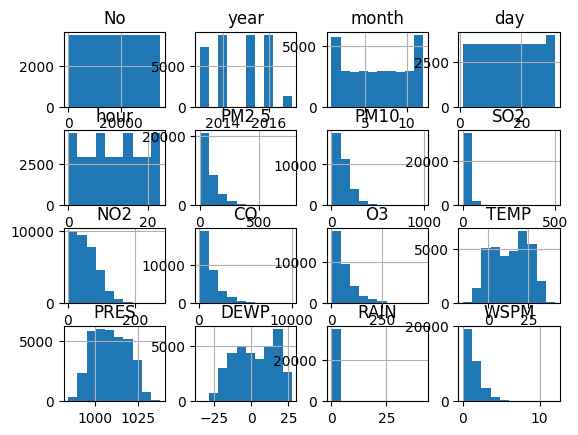

In [ ]:
gucheng_df.hist()

### Melihat Correlasi antara variabel

In [ ]:
gucheng_df.corr()

<ipython-input-94-9beb3d162d56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gucheng_df.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.003704,-0.027313,-0.176781,-0.100904,-0.006011,-0.048727,-0.134141,0.169769,-0.109555,0.008470,0.255507
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.007803,-0.021765,-0.118067,-0.112999,-0.011013,-0.022056,-0.163163,0.169152,-0.171099,0.003759,0.300857
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.015842,-0.023203,-0.227376,0.056506,0.021338,-0.104240,0.130822,-0.014821,0.261091,0.019144,-0.207434
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.007493,0.032033,0.004857,0.014021,-0.023264,-0.001714,0.014751,0.013852,0.023566,-0.004432,0.006791
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,0.051518,0.100833,0.050831,0.003488,-0.016185,0.290820,0.140499,-0.038531,-0.008546,0.011704,0.149041
PM2.5,-0.003704,-7.802917e-03,1.584249e-02,7.492943e-03,5.151827e-02,1.000000,0.855119,0.459293,0.695392,0.767899,-0.186937,-0.144407,0.019692,0.099236,-0.019329,-0.252294
PM10,-0.027313,-2.176549e-02,-2.320278e-02,3.203282e-02,1.008335e-01,0.855119,1.000000,0.403690,0.681155,0.637967,-0.131568,-0.057146,-0.065550,0.097019,-0.032246,-0.196015
SO2,-0.176781,-1.180672e-01,-2.273763e-01,4.856676e-03,5.083144e-02,0.459293,0.403690,1.000000,0.499605,0.565359,-0.209871,-0.394907,0.271281,-0.346338,-0.043281,-0.086947
NO2,-0.100904,-1.129992e-01,5.650586e-02,1.402110e-02,3.488317e-03,0.695392,0.681155,0.499605,1.000000,0.713781,-0.511384,-0.255169,0.103904,0.011419,-0.046583,-0.428972
CO,-0.006011,-1.101299e-02,2.133757e-02,-2.326444e-02,-1.618482e-02,0.767899,0.637967,0.565359,0.713781,1.000000,-0.364361,-0.399951,0.235782,-0.137159,-0.021334,-0.267810


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan CO jdi stasiun Gucheng setiap jamnya

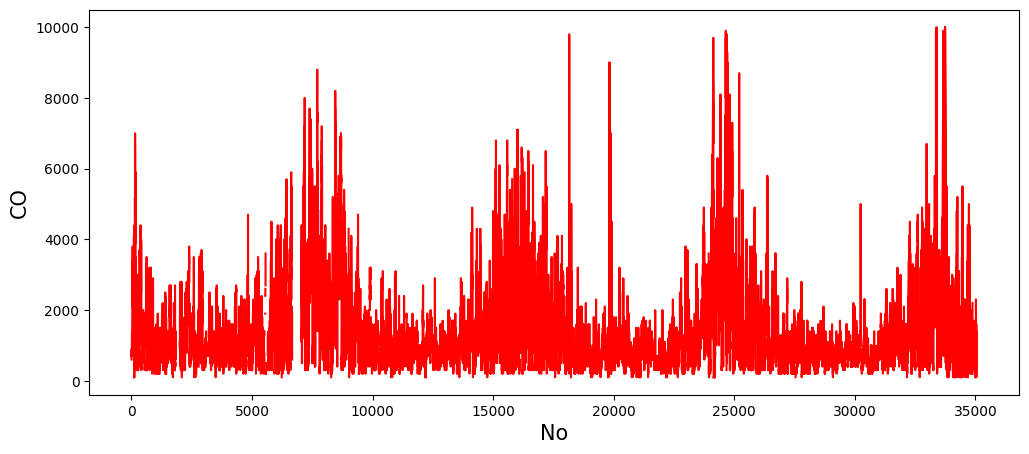

In [ ]:
Time=gucheng_df['No']
CO=gucheng_df['CO']
plt.figure(figsize=(12, 5))
plt.plot(Time, CO, color='red')
plt.xlabel('No',size=15)
plt.ylabel('CO',size=15)
plt.show()

Berdasarkan line plot yang tampil pada output dapat dilihat bahwa perkembangan CO pada data di Stasiun Gucheng mengalami kenaikan dan penurunan secara periodik musiman

### Pertanyaan 2: Apa tipe wd yang sering terjadi di stasiun Gucheng?

In [ ]:
#Menghitung jumlah terjadinya tipe wd di Stasiun Gucheng
guchengg_df = gucheng_df.groupby("wd").No.count().sort_values(ascending=False).reset_index()
guchengg_df.rename(columns={
    "No": "casus_count"
}, inplace=True)
guchengg_df.head(15)

,wd,casus_count
0,N,3949
1,NE,3119
2,SSW,2762
3,NW,2758
4,NNE,2602
5,S,2343
6,W,2331
7,WNW,2073
8,SW,1993
9,ENE,1885


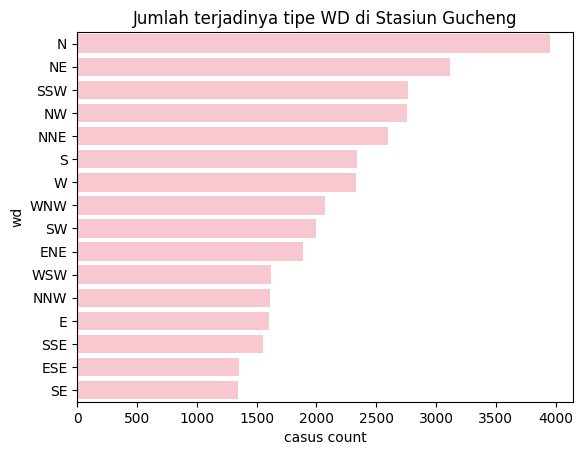

In [ ]:
sns.barplot(y=guchengg_df["wd"], x=guchengg_df["casus_count"], orient="h", color="pink")
plt.xlabel("casus count")
plt.title("Jumlah terjadinya tipe WD di Stasiun Gucheng")
plt.show()

Berdasarkan plot tersebut dapat dilihat bahwa tipe wd yang sering terjadi adalah N

### Pertanyaan 3 : Apakah terdapat korelasi antara SO2 dan O3?

In [ ]:
#hitung korelasi antara SO2 dan O3

sample_data = {
    'a': gucheng_df["SO2"],
    'b': gucheng_df['O3']
}

df = pd.DataFrame(sample_data)

df.corr(numeric_only=True)

,a,b
a,1.000000,-0.209871
b,-0.209871,1.000000


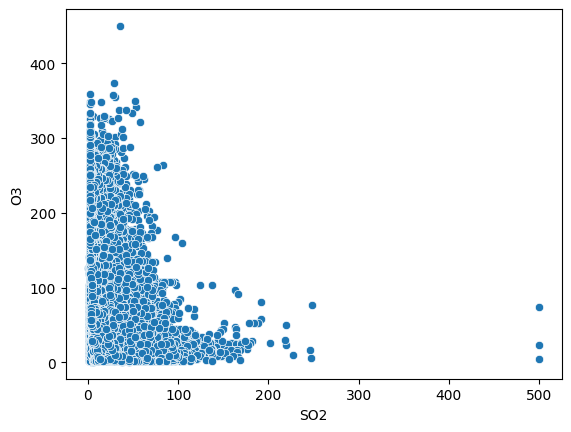

In [ ]:
#membuat scatter plot antara So2 dan O3

sns.scatterplot(x=gucheng_df['SO2'], y=gucheng_df['O3'])
plt.show()

Berdasarkan output tersebut, dapat dilihat bahwa SO2 dan O3 berkorelasi negatif yakni sebesar -0,209. Berdasarkan scaterplot juga dapat dilihat bahwa sebaran data membentuk pola berhubungan negatif. Artinya, berdasarkan analisis, jika SO2 meningkat 1 satuan akan menurunkan O3 sebesar 0,209

## Conclusion

- Perkembangan CO pada data di Stasiun Gucheng mengalami kenaikan dan penurunan secara periodik musiman
- Tipe wd yang sering terjadi adalah N
- SO2 dan O3 berkorelasi negatif yakni sebesar -0,209. Berdasarkan scaterplot juga dapat dilihat bahwa sebaran data membentuk pola berhubungan negatif.